In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import emcee

In [3]:
x, y, yerr = np.loadtxt("data.dat", unpack = True)

<Container object of 3 artists>

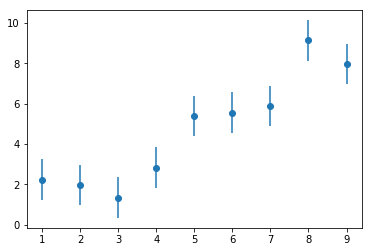

In [4]:
plt.errorbar(x,y,yerr, fmt="o")

In [5]:
def f(x, a, b):
    return a*x+b

In [6]:
# model y = ax + b
# theta = (a,b)
def lnlike(theta, x, y, yerr):
    # log(likelihood)
    # likelihood = exp(-chi^2/2)
    # log(likelihood) = -chi^2/2
    a, b = theta
    chi2 = np.sum((y - f(x, a, b))**2/yerr**2)
    # print "chi2:", chi2
    return -0.5*chi2


In [7]:
lnlike((1,0), x, y, yerr)

-4.7867297545267764

In [8]:
ndim, nwalkers = 2, 100

a_init = 1.5
b_init = -0.5
theta_init = np.array([a_init,b_init])

pos = [theta_init + 5e-1*np.random.randn(ndim) for i in range(nwalkers)]
データ点にガウス分布の誤差を持たせるprint pos

[array([ 1.05194606, -0.62405536]), array([ 0.8315804 , -0.76775588]), array([ 2.15893887, -0.30285934]), array([ 2.72309082,  0.24055892]), array([ 1.44247455,  0.34054668]), array([ 2.34582524, -0.96283732]), array([ 0.89716762, -0.44167941]), array([ 0.78395468, -0.64296435]), array([ 1.70831875, -0.01718065]), array([ 1.5356591 , -0.40935905]), array([ 1.81552226, -0.30732019]), array([ 1.48185254, -0.45171802]), array([ 1.30014416, -0.82847074]), array([ 1.77187814, -1.07786233]), array([ 1.14416737,  0.01547967]), array([ 1.29031009, -0.11813921]), array([ 1.11375684, -0.35146185]), array([ 1.58696138, -0.72059189]), array([ 1.16105911,  0.60021262]), array([ 1.439652  , -0.39946891]), array([ 1.32994594, -0.46046951]), array([ 2.04518059, -0.18532073]), array([ 1.66835831, -1.11884306]), array([ 1.90373533, -0.29617005]), array([ 1.46450715, -0.3273894 ]), array([ 2.00797981, -1.08595433]), array([ 1.33427573, -0.22369937]), array([ 1.90987715,  0.37820516]), array([ 1.26289505,

In [9]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=(x, y, yerr))


In [10]:
sampler.run_mcmc(pos, 500)

(array([[ 1.06844174, -0.50540828],
        [ 0.89608487, -0.39514515],
        [ 0.79968658,  0.74442395],
        [ 0.92571159,  0.40370461],
        [ 1.01173569, -0.2919663 ],
        [ 0.96884038, -0.39988457],
        [ 0.6927194 ,  0.89378886],
        [ 0.95395518, -0.02635686],
        [ 0.86461199,  0.31509624],
        [ 0.84961524,  0.36137348],
        [ 0.77827365,  0.79811744],
        [ 1.06632281, -0.58407747],
        [ 0.99781619, -0.55951628],
        [ 0.73937551,  0.65747669],
        [ 0.88391856,  0.37466172],
        [ 0.89139454,  0.50522634],
        [ 0.68527125,  1.06336193],
        [ 0.89844084,  0.08528384],
        [ 0.92038957,  0.55400391],
        [ 0.94545906, -0.26597379],
        [ 1.09813042, -0.53565228],
        [ 0.76496403,  1.05276201],
        [ 0.96418964, -0.08523587],
        [ 0.9611391 ,  0.21760647],
        [ 0.89996584,  0.29022758],
        [ 0.90491362, -0.08783126],
        [ 0.80909022,  0.51691191],
        [ 0.92689555, -0.034

In [11]:
samples = sampler.chain[:, :, :].reshape((-1, ndim))

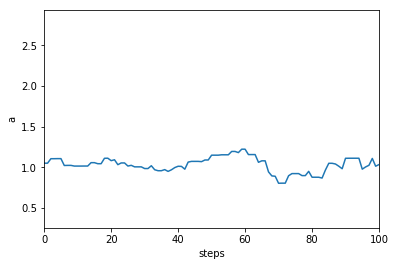

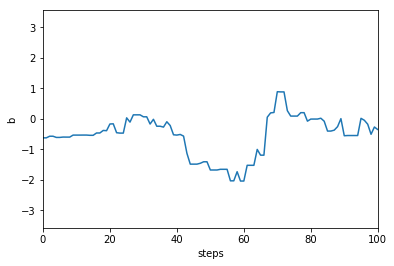

In [12]:
plt.figure()
plt.plot(samples[:,0]) # a
plt.xlabel("steps")
plt.xlim(0, 100)
plt.ylabel("a")
plt.figure()
plt.plot(samples[:,1]) # b
plt.xlabel("steps")
plt.xlim(0, 100)
plt.ylabel("b")



In [13]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

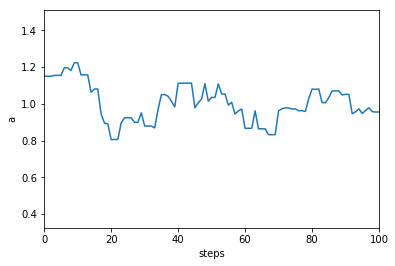

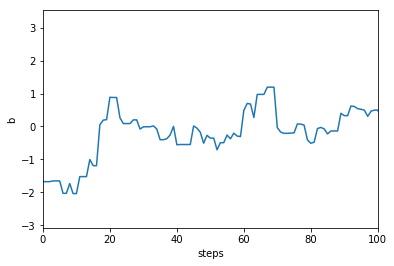

In [14]:
plt.figure()
plt.plot(samples[:,0]) # a
plt.xlabel("steps")
plt.xlim(0, 100)
plt.ylabel("a")
plt.figure()
plt.plot(samples[:,1]) # b
plt.xlabel("steps")
plt.xlim(0, 100)
plt.ylabel("b")


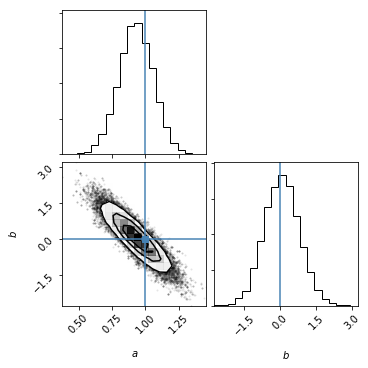

In [15]:
import corner
fig = corner.corner(samples, labels=["$a$", "$b$"],truths=[1,0])
#fig.savefig("triangle.png")

In [16]:
a_mcmc, b_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),zip(*np.percentile(samples, [16, 50, 84],axis=0)))

In [17]:
print a_mcmc
print b_mcmc

(0.92828824377934405, 0.1291964297557302, 0.1273601400250689)
(0.058850178960861976, 0.72601656518422675, 0.73058328659088312)


In [18]:
print "a=%s^+%s_-%s" % (a_mcmc[0], a_mcmc[1], a_mcmc[2])
print "b=%s^+%s_-%s" % (b_mcmc[0], b_mcmc[1], b_mcmc[2])

a=0.928288243779^+0.129196429756_-0.127360140025
b=0.0588501789609^+0.726016565184_-0.730583286591


In [21]:
chi2 = np.sum((y - f(x, a_mcmc[0], b_mcmc[0]))**2/yerr**2)
dof = len(x) - ndim

In [22]:
print "chi^2/dof = %s/%s = %s" % (chi2, dof, chi2/dof)


chi^2/dof = 8.51302182092/7 = 1.21614597442
